In [47]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model

import skimage
from skimage.io import imshow

import matplotlib.pyplot as plt
import numpy as np

## Hyperparameters Parameters


In [48]:
batch_size = 128
nb_class = 10
nb_epoch = 100

## Load Data


In [49]:


(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Data statistics


In [50]:
print("Number of Traning samples", len(x_train))
print("Number of Accociate Lebels", len(y_train))

print("Shaoe  of Traning samples", x_train.shape)
print("Datatype of Traning samples", x_train.dtype)


print("Number of Text samples", len(x_test))
print("Number of Accociate Lebels", len(y_test))


print("Shaoe  of Traning Labela", y_train.shape)

Number of Traning samples 60000
Number of Accociate Lebels 60000
Shaoe  of Traning samples (60000, 28, 28)
Datatype of Traning samples uint8
Number of Text samples 10000
Number of Accociate Lebels 10000
Shaoe  of Traning Labela (60000,)


## Visiualize data


In [51]:
x_train[0].shape

(28, 28)

In [52]:
a_random_sample = x_train[0]
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

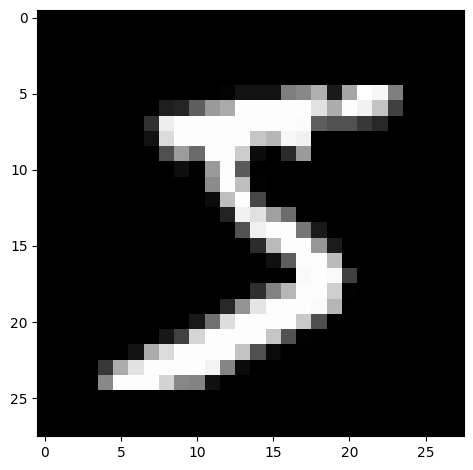

In [53]:
random_image = x_train[0]
imshow(random_image)

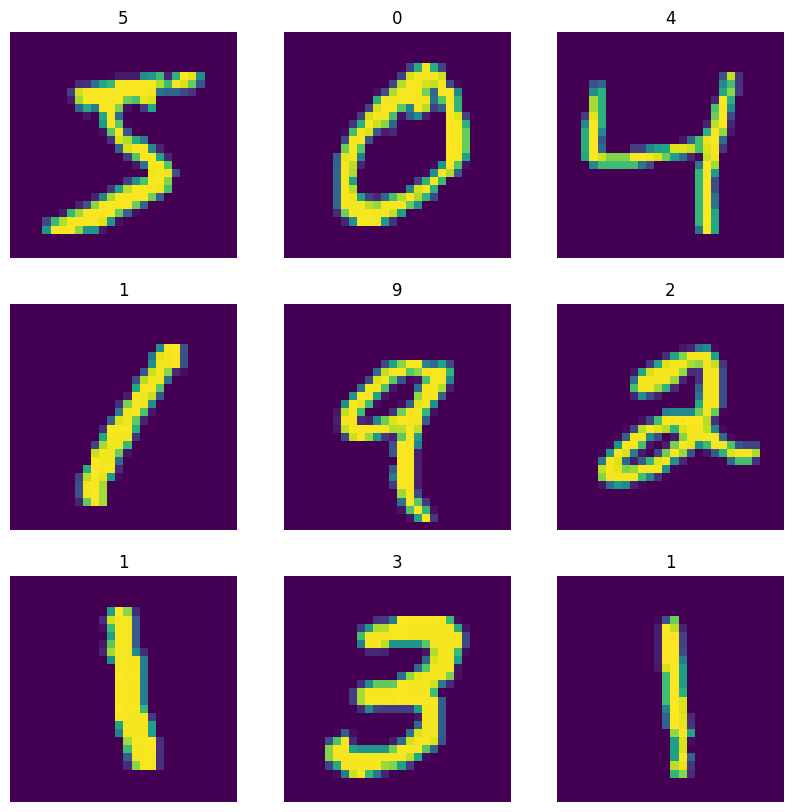

In [54]:
plt.figure(figsize=(10,10))

for i in range(9):
    ax= plt.subplot(3,3,i+1)

    an_image =x_train[i]

    plt.imshow(an_image)

    plt.title(int(y_train[i]))

    plt.axis("off")


## Reshape and Flatten Data


In [55]:
print ("Shape of Tranning Data : ",x_train.shape)
print ("Shape of Tranning Sample : ",x_train[0].shape)

Shape of Tranning Data :  (60000, 28, 28)
Shape of Tranning Sample :  (28, 28)


In [56]:
an_image = x_train[0]

print("Shape of a Sample Image ",an_image.shape)


Shape of a Sample Image  (28, 28)


#### Define a new shape and flatten the image


In [57]:
new_shape = 28*28

flatten_an_image = an_image.reshape(new_shape,)

print("Shape of a flatten Image ",flatten_an_image.shape)

Shape of a flatten Image  (784,)


In [58]:
print("Previous shape of x_train  ",x_train.shape)

Previous shape of x_train   (60000, 28, 28)


### flatten the whole traning data


In [59]:

x_train = x_train.reshape(60000,784)

print("new shape of x_train ",x_train.shape)

new shape of x_train  (60000, 784)


In [60]:
print("Previous shape of x_test  ",x_test.shape)

Previous shape of x_test   (10000, 28, 28)


In [ ]:
### flatten the whole text data

In [62]:

x_text = x_test.reshape(10000,784)

print("new shape of x_test ",x_test.shape)

new shape of x_test  (10000, 28, 28)


In [63]:
print("Previous Datatype of Train and Test samples : ")
print(x_train.dtype)
print(x_test.dtype)

Previous Datatype of Train and Test samples : 
uint8
uint8


In [65]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("new Datatype of Train and Test samples : ")
print(x_train.dtype)
print(x_test.dtype)

new Datatype of Train and Test samples : 
float32
float32


## Rescaling data


In [99]:
# get a random sample
a_sample = x_train[0]

print('Min value of samle: ',a_sample.min())
print('Max value of samle: ',a_sample.max())

Min value of samle:  0.0
Max value of samle:  1.0


In [72]:
# derive each value in train and test data by 255

x_train /=255
x_test /=255

In [73]:
a_sample = x_train[0]

In [100]:

print('Min value of samle: ',a_sample.min())
print('Max value of samle: ',a_sample.max())

Min value of samle:  0.0
Max value of samle:  1.0


## Binarize Lebels


In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [76]:
y_train.shape

(60000,)

In [78]:
input_array = np.array([0,1,2,3,4,5,6,7,8,9])
print(input_array)
print("Input list shape : ",input_array.shape)

output = to_categorical(input_array,num_classes=10)

print(output)
print("input list shape :" , input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
Input list shape :  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
input list shape : (10,)


In [ ]:
num_classes=10

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

## Define Model


In [84]:
model = Sequential()

model.add(Input(shape=(784,)))

model.add(Dense(784,activation='relu'))
model.add(Dense(625,activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile Model


In [87]:
learning_rate = 0.001

optimizer = SGD(learning_rate=learning_rate)

loss = 'categorical_crossentropy'
metrics =['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


## Visualize Model


In [88]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 625)            │       490,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         6,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,325 (4.24 MB)

 Trainable params: 1,112,325 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

# Model traning


In [ ]:

history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size)


### Inference On Test Data


In [ ]:
evalution = model.evaluate(x_test,y_test)

print("Summary : loss over the test dataset: %.2f, accuracy: %.2f" % (evaluation[0]*100,evaluation[1]*100))

In [ ]:
training_loss = history.history['loss']

In [ ]:
epoch_count = range(1,len(training_loss)+1)

In [ ]:
# visualize loss history

plt.plot(epoch_count,training_loss,'r--')
plt.legend("Training Loss")
plt.xlebel('Epoch')
plt.ylebel('Loss')
plt.show()

### get training accuraccy history


In [ ]:
training_accuracy = history.history['accuracy']

epoch_count = range(1,len(training_loss)+1)

plt.plot(epoch_count,training_loss,'b--')
plt.legend("Training Acuracy")
plt.xlebel('Epoch')
plt.ylebel('Acuracy')
plt.show()